In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#import data
data = pd.read_csv(r"C:\Users\Administrator\Desktop\work\high_diamond_ranked_10min.csv")

<h1><strong>1. Exploratory analysis to see some attributes' relationship to game result</strong></h1>

In [55]:
#check if there is any NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [56]:
#quick glimpse of the data
data.head()
#Data looks pretty clean. Since the data is ten minutes in game, so there is no need to drop remakes.

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [57]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


<h3><em>First let's see if starting on a particular side grants certain advantage</em></h3>

blue total wins: 4930
red total wins: 4949


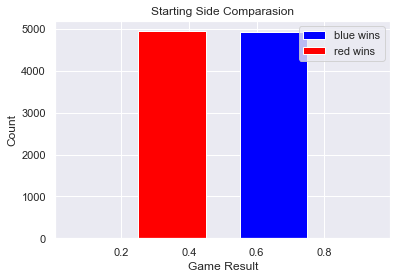

In [58]:
#Separate data into blue-won games and blue-lost games
bw_game = data.loc[data['blueWins'] == 1].copy()
bl_game = data.loc[data['blueWins'] == 0].copy()

#how many games won and lost by blue team
bw = bw_game['blueWins']
rw = bl_game['blueWins']

print('blue total wins: ' + str(bw.count()) + '\n' + 'red total wins: ' + str(rw.count()))

b,r = plt.subplots(1, 1)

plt.hist([bw_game['blueWins'], bl_game['blueWins']], bins = 2, color=['blue', 'red'],label = ['blue wins','red wins'])
plt.legend(loc = 'upper right')

plt.title('Starting Side Comparasion')
plt.xlabel('Game Result')
plt.ylabel('Count')

plt.show()



*From the plot and figuer we can see that it does not matter much as to start on a particular side of the map.*

<h3><em>How kills, deathes and assists affect game result</em></h3>

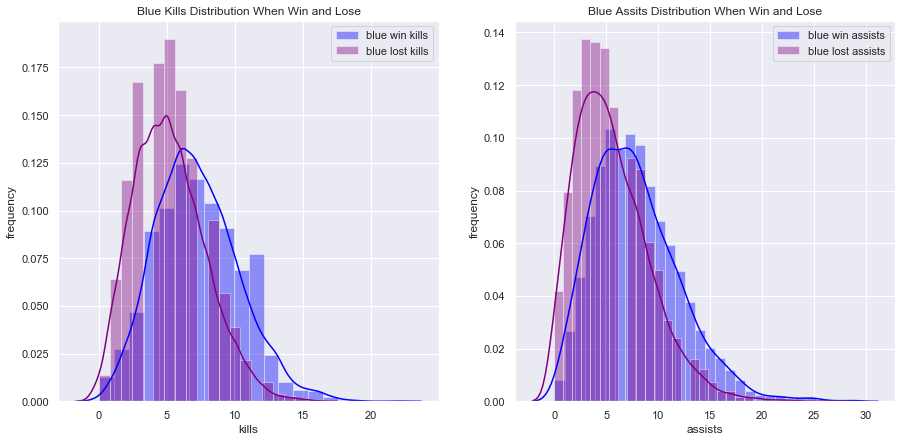

In [59]:
sns.set(style = 'darkgrid')
f, axe = plt.subplots(1,2, figsize =(15,7))

sns.distplot(bw_game['blueKills'], bins = 20, label = 'blue win kills', color = 'blue',ax= axe[0])
sns.distplot(bl_game['blueKills'], bins = 20, label = 'blue lost kills', color = 'purple',ax= axe[0])

axe[0].set_title('Blue Kills Distribution When Win and Lose')
axe[0].set_xlabel('kills')
axe[0].set_ylabel('frequency')
axe[0].legend()


sns.distplot(bw_game['blueAssists'], bins = 30, label = 'blue win assists', color = 'blue',ax= axe[1])
sns.distplot(bl_game['blueAssists'], bins = 30, label = 'blue lost assists', color = 'purple',ax= axe[1])

axe[1].set_title('Blue Assits Distribution When Win and Lose')
axe[1].set_xlabel('assists')
axe[1].set_ylabel('frequency')
axe[1].legend()
plt.show()

*Here I only listed kills and assists since deathes are directly dependant to kills.*  
*The analysis shows that when team have more kills and assists, they are more likely to win.*

<h3><em>Does vision control makes an impact on team KDA</em></h3>

The correlation between vision and KDA is: 0.11331756635322085


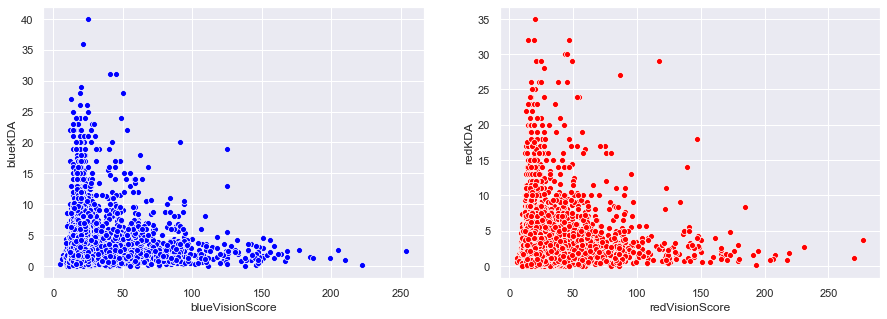

In [60]:

#Calculate vision score by adding up wards placed and destroyed
data['blueVisionScore'] = data['blueWardsPlaced'] + data['blueWardsDestroyed']
data['redVisionScore'] = data['redWardsPlaced'] + data['redWardsDestroyed']

#Caculate KDA by the formula KDA = (Kills + Assits)/Deaths
data['blueKDA'] = (data['blueKills'] + data['blueAssists'])/data['blueDeaths']
data['redKDA'] = (data['redKills'] +data['redAssists'])/data['redDeaths']

f, a =plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x=data['blueVisionScore'], y=data['blueKDA'], color='blue',ax=a[0])
sns.scatterplot(x=data['redVisionScore'], y=data['redKDA'], color='red',ax=a[1])

vis_KDA_corr = data['blueVisionScore'].corr(data['blueKDA'], method='spearman')
print('The correlation between vision and KDA is: {}'.format(vis_KDA_corr))

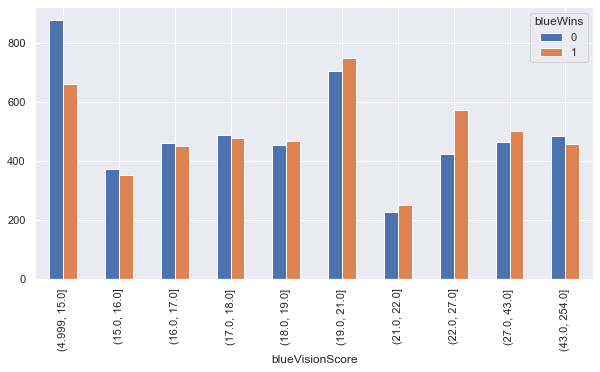

In [81]:
#if it does little to KDA, how does it directly correlate to game result?
vis_bins = pd.qcut(data['blueVisionScore'], 10)
pd.crosstab(vis_bins, data['blueWins']).plot(kind='bar',figsize=(10,5))

*From above analysis, we are able to tell that vision control is relatively irrelevant in Diamond-elo games*

<h3><em>Dragon for the Win?<em><h3>

Text(0.9, 2400, '2292')

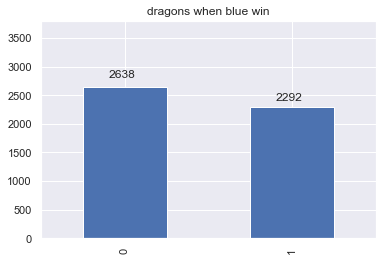

In [164]:
bar1 = bw_game['blueDragons'].value_counts().plot(kind='bar', ylim=(0,3800), title='dragons when blue win')
bar1.annotate(bw_game[bw_game['blueDragons'] == 0]['blueDragons'].count(), xy=(-0.1, 2800))
bar1.annotate(bw_game[bw_game['blueDragons'] == 1]['blueDragons'].count(), xy=(0.9, 2400))

Text(0.9, 1400, '1284')

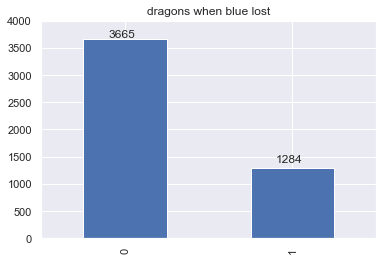

In [165]:
bar2 = bl_game['blueDragons'].value_counts().plot(kind='bar', ylim=(0,4000), title='dragons when blue lost')
bar2.annotate(bl_game[bl_game['blueDragons'] == 0]['blueDragons'].count(), xy=(-0.1, 3700))
bar2.annotate(bl_game[bl_game['blueDragons'] == 1]['blueDragons'].count(), xy=(0.9, 1400))

*It seems when a team lose, they are likely to have no dragons in the first 10 min* 

<h3><em>let's take a look at the gold and experience<em><h3>

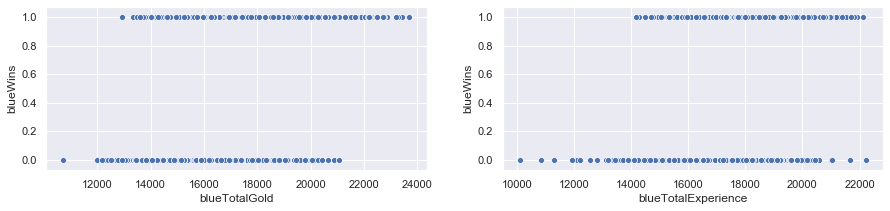

In [97]:
#To see the relationship that total gold and exp have with the game result 
f, p= plt.subplots(1,2, figsize=(15,3))
sns.scatterplot(x=data['blueTotalGold'],y=data['blueWins'], ax=p[0])
sns.scatterplot(x=data['blueTotalExperience'],y=data['blueWins'], ax=p[1])

*We see that for the 'total gold' feature, there seems to be two clear thresholds that separate the data set*  
*Let's find out*

In [147]:
#Take out the feature we need
df_tot_gold = data[['blueTotalGold','blueWins']].sort_values(by='blueTotalGold').reset_index()
first_thresh = 0
second_thresh = 0
total_games = data['blueTotalGold'].count()

for i in range(total_games - 1):
    if df_tot_gold.iloc[i, 2] != 0:
        first_thresh = i
        break
        
    
for i in range(total_games-1):
    if df_tot_gold.iloc[-i -1, 2] == 0:
        second_thresh = -i -1
        break

print('The first threshold is where blue totle gold = {}, blue loses when they have less total gold'.format(df_tot_gold.iloc[first_thresh, 1]))
print('The second threshold is where blue totle gold = {}, blue wins when they have more total gold'.format(df_tot_gold.iloc[second_thresh, 1]))
        


The first threshold is where blue totle gold = 12939, blue loses when they have less total gold
The second threshold is where blue totle gold = 21055, blue wins when they have more total gold


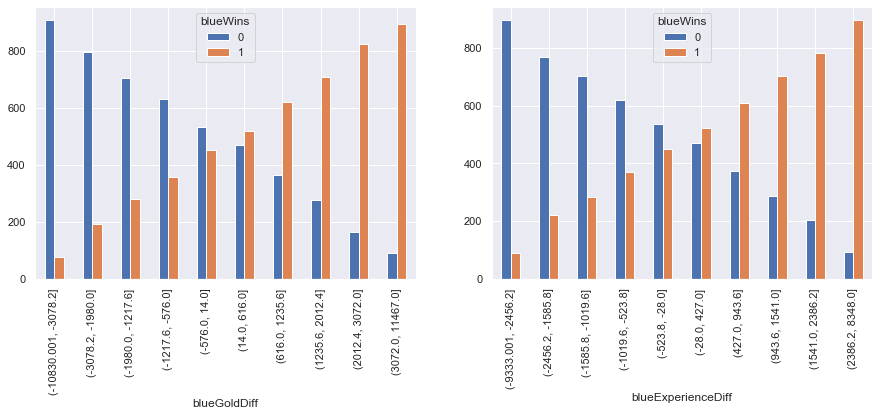

In [151]:
#Take another approach to see how gold and exp correlate with game results
gold_bins = pd.qcut(data['blueGoldDiff'], 10)
exp_bins = pd.qcut(data['blueExperienceDiff'], 10)

f,p = plt.subplots(1,2, figsize=(15, 5))

gold_p = pd.crosstab(gold_bins, data['blueWins']).plot(kind='bar',ax=p[0])
exp_p = pd.crosstab(exp_bins, data['blueWins']).plot(kind='bar', ax=p[1])


*Apparently it is a positive correlation between (gold/exp, result)*

<h3><em>Lastly, we examine the impact of towers<em><h3>

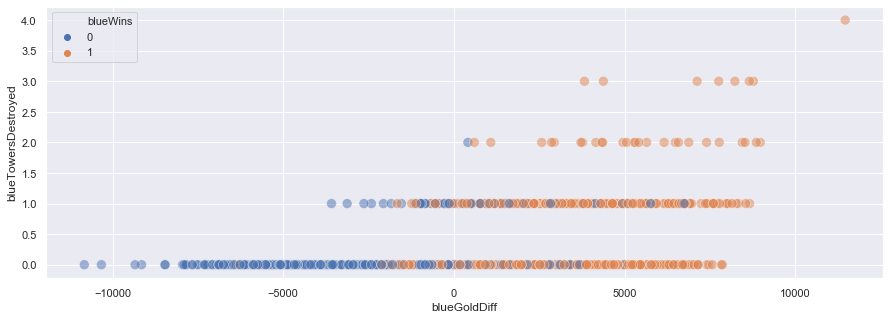

In [197]:
f,p = plt.subplots(figsize=(15, 5))
sns.scatterplot(y=data['blueTowersDestroyed'], x=data['blueGoldDiff'], hue=data['blueWins'], alpha=0.5, ax=p, s=100)

*Generally, more tower destroyed at 10 mins, the team is more likely to bigger gold diff, thus more likely to win

<h1>2. Predict game result using Logistic Regression</h1>

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#feature selection -- based on the exploratory analysis and personal game experience
feature_cols = ['blueKills','blueAssists','blueDragons','blueTowersDestroyed','blueGoldDiff','blueExperienceDiff']
X = data[[feature_cols]]
y = data.blueWins

#because the 'golddiff' and 'expdiff' are numbers too large comparing to other features with two digits at maxium
#we need to normalize the two feature to avoid unnatural skewing



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()